# Machine Learning for Health Insurance Example

#### The visual analytic flow is taken from [Dandelion] (https://www.kaggle.com/hely333)
#### The codes are edited by ASKS Data Science Group 
##### Edited by ASKS Data Science Group

## Step 1: Checking the data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance_data = pd.read_csv('../data/insurance_add_step.csv')
insurance_data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19.0,0,27.900,3009.0,0.0,1,southwest,16884.92400,1.0
1,18.0,male,33.770,3008.0,1.0,0,southeast,1725.55230,1.0
2,28.0,male,33.000,3009.0,3.0,0,southeast,4449.46200,0.0
3,33.0,male,22.705,10009.0,NaN,0,northwest,21984.47061,0.0
4,32.0,male,28.880,8010.0,NaN,0,northwest,3866.85520,1.0


In [3]:
insurance_data.isnull().sum()

age                 5
sex                 0
bmi                 0
steps              13
children          104
smoker              0
region              0
charges             2
insuranceclaim      2
dtype: int64

In [4]:
insurance_data.describe()

,age,bmi,steps,children,smoker,charges,insuranceclaim
count,1339.000000,1344.000000,1331.000000,1240.000000,1344.000000,1342.000000,1342.000000
mean,39.222554,30.659446,5358.096920,1.185484,0.203869,13265.808050,0.584948
std,14.073363,6.093595,2456.921349,1.209773,0.403023,12098.073122,0.492915
min,18.000000,15.960000,2908.000000,0.000000,0.000000,1121.873900,0.000000
25%,26.500000,26.308750,3009.000000,0.000000,0.000000,4740.287150,0.000000
50%,39.000000,30.380000,4007.000000,1.000000,0.000000,9382.033000,1.000000
75%,51.000000,34.681250,8004.000000,2.000000,0.000000,16639.912515,1.000000
max,64.000000,53.130000,10010.000000,5.000000,1.000000,63770.428010,1.000000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
df = insurance_data.copy()

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1192f46d8>,
      dtype=object)

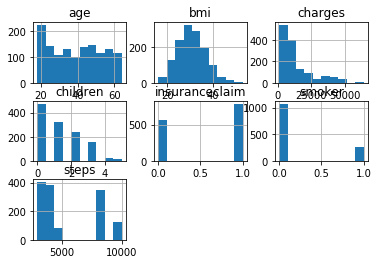

In [8]:
df.hist()

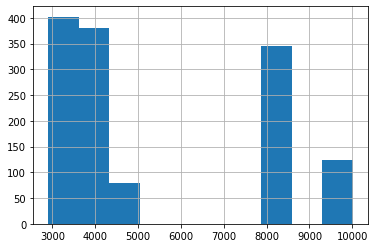

In [9]:
df.steps.hist()

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [11]:
df.sex.value_counts()

male      517
female    502
0         162
1         161
11          2
Name: sex, dtype: int64

In [12]:
df.smoker.value_counts()

0    1070
1     274
Name: smoker, dtype: int64

In [13]:
df.region.value_counts()

southeast    365
northwest    328
northeast    326
southwest    325
Name: region, dtype: int64

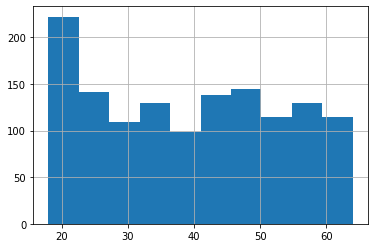

In [14]:
df.age.hist()

In [15]:
df.age.mean()

39.22255414488424

In [16]:
df.isnull().sum()

age                 5
sex                 0
bmi                 0
steps              13
children          104
smoker              0
region              0
charges             2
insuranceclaim      2
dtype: int64

### Preparing the data

Now that we've looked at the data set, we need to prepare them before we proceed with the analysis for both the regression, and the classification. Again, we will use the DataFrame for both tasks.

### 1.1 Missing values

##### 1.1.1 Fillna

In [17]:
df['age'].fillna(39, inplace=True)

In [18]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
steps              13
children          104
smoker              0
region              0
charges             2
insuranceclaim      2
dtype: int64

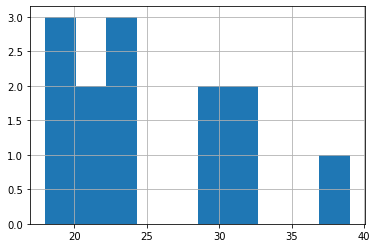

In [19]:
df[df.steps.isnull()].age.hist()

In [20]:
df.steps.min()

2908.0

In [21]:
min_steps = df[ (df.age >=20) & (df.age <=40)].steps.min()

In [22]:
df['steps'].fillna(min_steps, inplace=True)

In [23]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
steps               0
children          104
smoker              0
region              0
charges             2
insuranceclaim      2
dtype: int64

In [24]:
df[df.children.isnull()]

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
3,33.0,male,22.705,10009.0,NaN,0,northwest,21984.47061,0.0
4,32.0,male,28.880,8010.0,NaN,0,northwest,3866.85520,1.0
10,25.0,male,26.220,8006.0,NaN,0,northeast,2721.32080,1.0
11,62.0,female,26.290,5004.0,NaN,1,southeast,27808.72510,1.0
12,23.0,1,34.400,3008.0,NaN,0,southwest,1826.84300,1.0
13,56.0,female,39.820,4001.0,NaN,0,southeast,11090.71780,1.0
30,22.0,1,35.600,4008.0,NaN,1,southwest,35585.57600,1.0
31,18.0,female,26.315,8004.0,NaN,0,northeast,2198.18985,1.0
33,63.0,male,28.310,5002.0,NaN,0,northwest,13770.09790,1.0
35,19.0,male,20.425,10006.0,NaN,0,northwest,1625.43375,0.0


In [25]:
df['children'].fillna(0, inplace=True)

In [26]:
df.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           2
insuranceclaim    2
dtype: int64

##### 1.2 Drop all NA

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [29]:
df.sex.value_counts()

male      515
female    502
0         162
1         161
11          2
Name: sex, dtype: int64

### 1.2 Invalid values

##### 1.2.1 Replace values

In [30]:
 df['sex'].replace('0','female', inplace=True)

In [31]:
 df['sex'].replace('1','male', inplace=True)

In [32]:
 df['sex'].replace('11','male', inplace=True)

In [33]:
df.sex.value_counts()

male      678
female    664
Name: sex, dtype: int64

In [34]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19.0,female,27.900,3009.0,0.0,1,southwest,16884.92400,1.0
1,18.0,male,33.770,3008.0,1.0,0,southeast,1725.55230,1.0
2,28.0,male,33.000,3009.0,3.0,0,southeast,4449.46200,0.0
3,33.0,male,22.705,10009.0,0.0,0,northwest,21984.47061,0.0
4,32.0,male,28.880,8010.0,0.0,0,northwest,3866.85520,1.0


In [35]:
df.dtypes

age               float64
sex                object
bmi               float64
steps             float64
children          float64
smoker              int64
region             object
charges           float64
insuranceclaim    float64
dtype: object

### 1.3 Transform data

In [36]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['sex_code'] = lb_make.fit_transform(df['sex'])
df['region_code'] = lb_make.fit_transform(df['region'])

In [37]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,sex_code,region_code
0,19.0,female,27.900,3009.0,0.0,1,southwest,16884.92400,1.0,0,3
1,18.0,male,33.770,3008.0,1.0,0,southeast,1725.55230,1.0,1,2
2,28.0,male,33.000,3009.0,3.0,0,southeast,4449.46200,0.0,1,2
3,33.0,male,22.705,10009.0,0.0,0,northwest,21984.47061,0.0,1,1
4,32.0,male,28.880,8010.0,0.0,0,northwest,3866.85520,1.0,1,1


In [38]:
df = df.drop(columns=['sex','region'])

In [39]:
df.dtypes

age               float64
bmi               float64
steps             float64
children          float64
smoker              int64
charges           float64
insuranceclaim    float64
sex_code            int64
region_code         int64
dtype: object

## Step 2: The Visualization

#### 2.1 Scatter Plot

One of the first plot that we can try is scatter plot to see the relationship between 2 variables

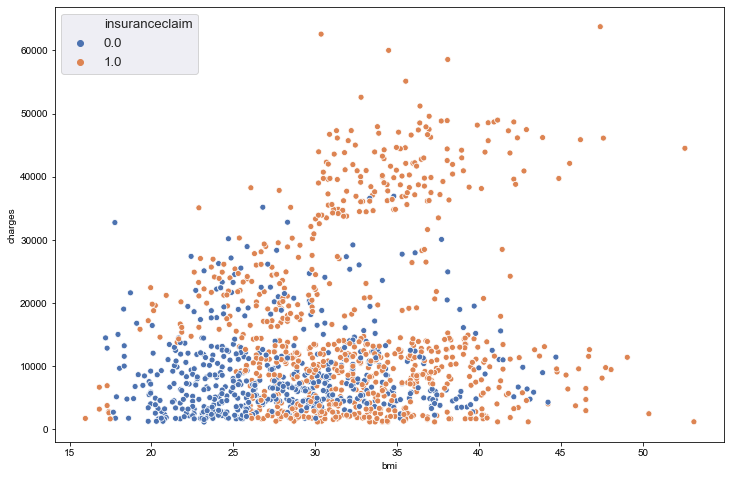

In [40]:
import seaborn as sns
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="bmi", y="charges", hue='insuranceclaim', data=df)

#### 2.2 Correlation Heat Map

Next we will plot the correlation value between features as heatmap. (Dataframe has .corr() function for the correlation.)

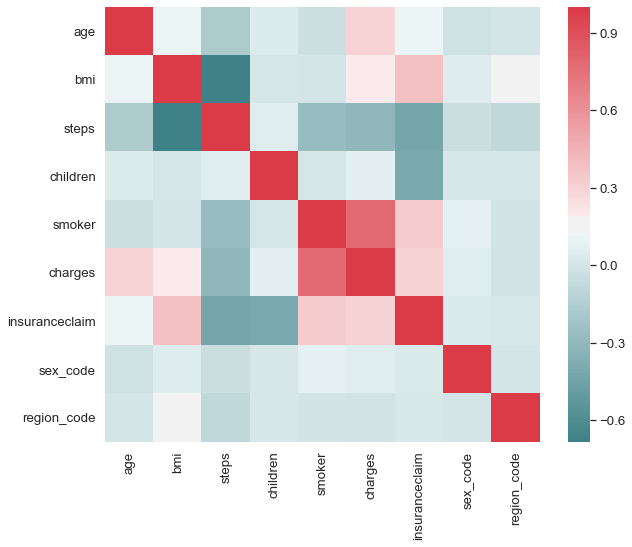

In [41]:
import seaborn as sns
import numpy as np

fi, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axis)

#### 2.3 Distribution Map

Representation of the distribution of numerical data in one variable.<br>
We can use 2 libraries for plotting distribution map <br>
1. matplotlib
2. seaborn

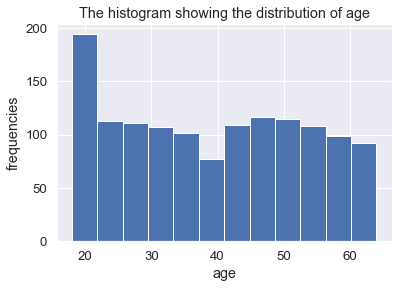

In [42]:
plt.hist(df.age, bins='auto') 
plt.title("The histogram showing the distribution of age")
plt.xlabel('age')
plt.ylabel('frequencies')
plt.show()

Text(0.5, 1.0, 'The histogram showing the distribution of age')

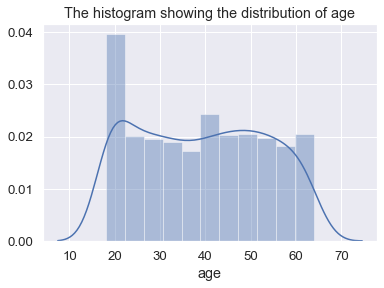

In [43]:
sns.distplot(df.age)
plt.title("The histogram showing the distribution of age")

We use distribution map to compare the data between smoker and non-smoker by using subplot.

Text(0.5, 1.0, 'The distribution of the medical charges for the smokers')

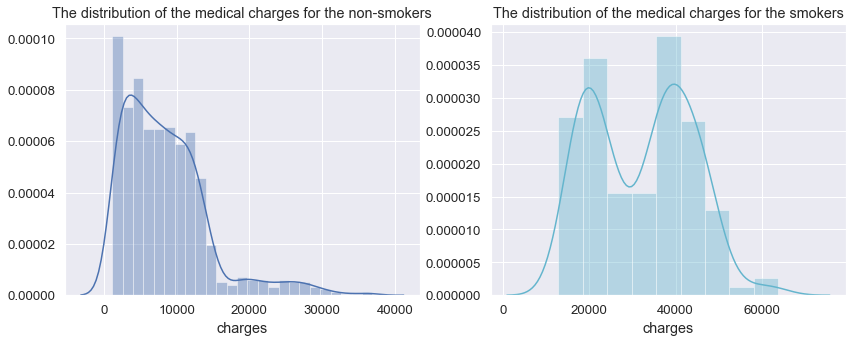

In [44]:
fi= plt.figure(figsize=(14,5))

axis=fi.add_subplot(121)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=axis)
axis.set_title('The distribution of the medical charges for the non-smokers')

axis=fi.add_subplot(122)
sns.distplot(df[(df.smoker == 1)]['charges'],color='c',ax=axis)
axis.set_title('The distribution of the medical charges for the smokers')

### 2.4 Plotting with Categorical data

To show the relationship between multiple variables in a dataset, one of the main variables is “categorical” (divided into discrete groups)<br>
There are many kinds of catplot, the example are:
1. count
2. bar
3. box
4. swarm
5. violin

##### Bar

Text(0.5, 1, 'xxx')

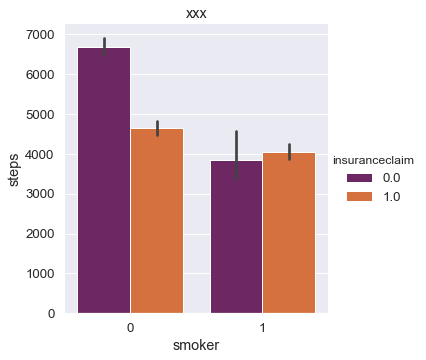

In [45]:
sns.catplot(x='smoker', y='steps', hue='insuranceclaim', kind='bar', palette="inferno", data=df)
plt.title('xxx')

##### Count

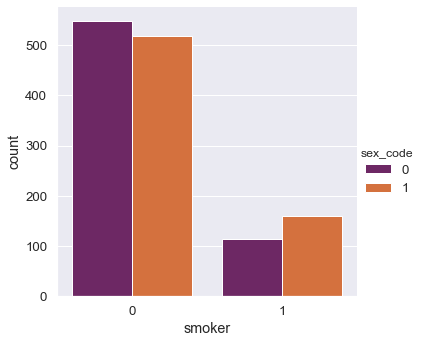

In [46]:
sns.catplot(x="smoker", kind="count",hue = 'sex_code', palette="inferno", data=df)

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

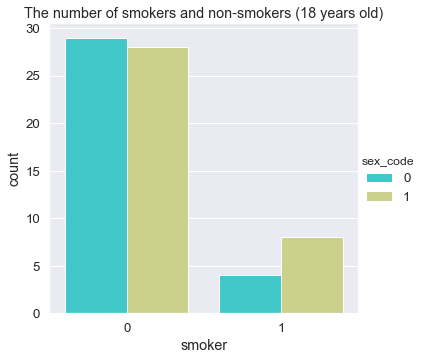

In [47]:
sns.catplot(x="smoker", kind="count",hue = 'sex_code', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

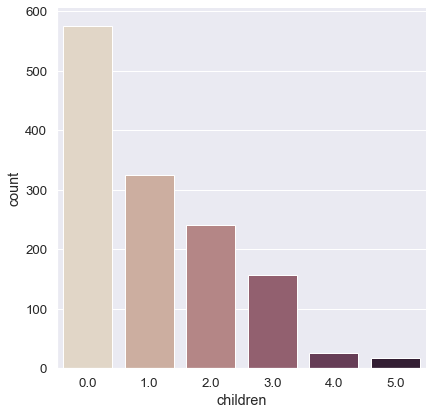

In [48]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=df, size = 6)

Text(0.5, 1, 'Smokers and non-smokers who have childrens')

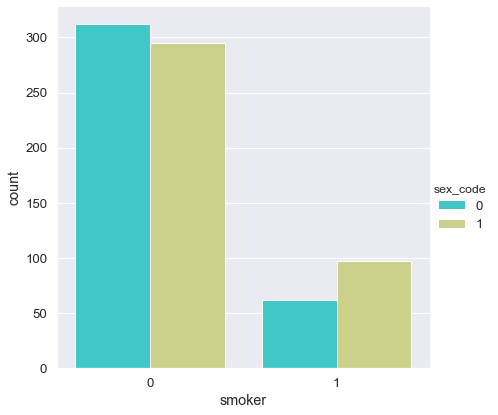

In [49]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex_code",
            data=df[(df.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

##### Swarm

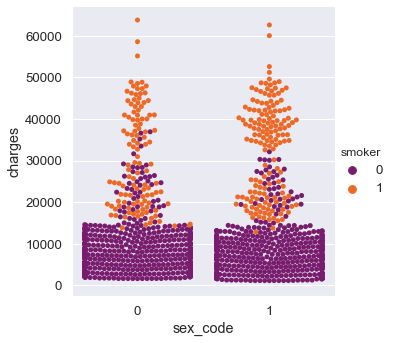

In [50]:
sns.catplot(x="sex_code", y="charges", hue="smoker", kind="swarm", palette = 'inferno', data=df)

##### Violin

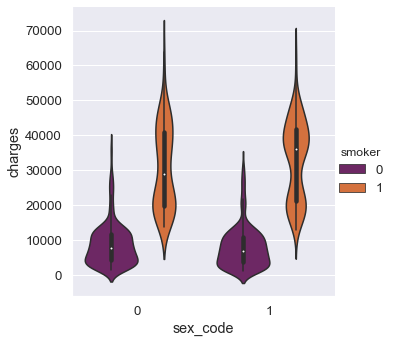

In [51]:
sns.catplot(x="sex_code", y="charges", hue="smoker", kind="violin", palette = 'inferno', data=df)

##### Box

Text(0.5, 1, "The box plot of males' medical charges")

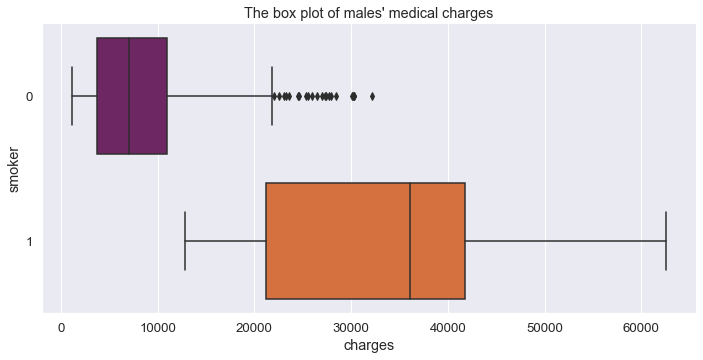

In [52]:
sns.catplot(x='charges', y='smoker', data=df[(df.sex_code == 1)] , orient='h', kind='box' , palette = 'inferno', 
           height=5, aspect=2)
plt.title("The box plot of males' medical charges")

### 2.5 Boxplot

Text(0.5, 1.0, "The box plot of males' medical charges")

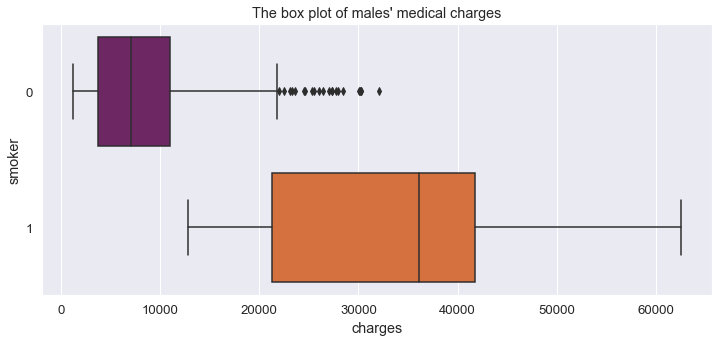

In [53]:
plt.figure(figsize=(12,5))
sns.boxplot(y="smoker", x="charges", data = df[(df.sex_code == 1)] 
            ,orient="h", palette = 'inferno')
plt.title("The box plot of males' medical charges")

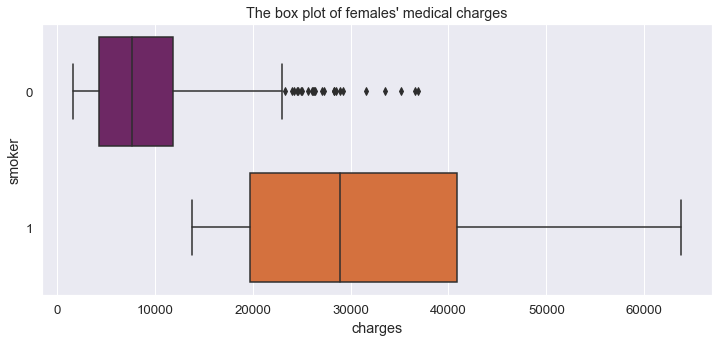

In [54]:
plt.figure(figsize=(12,5))
plt.title("The box plot of females' medical charges")
sns.boxplot(y="smoker", x="charges", data = df[(df.sex_code == 0)] 
            ,orient="h", palette = 'inferno')

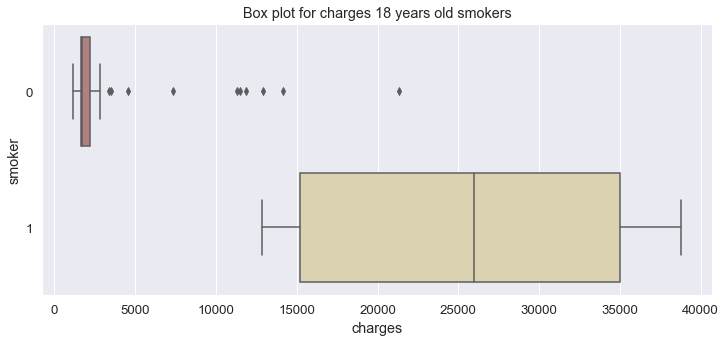

In [55]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

### 2.6 JointPlot

Text(0.5, 1, 'Distribution of charges and age for smokers')

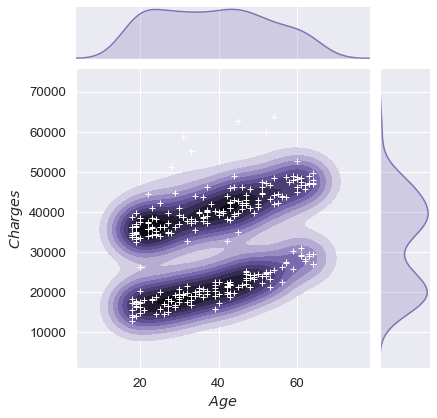

In [56]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 1)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1, 'Distribution of charges and age for non-smokers')

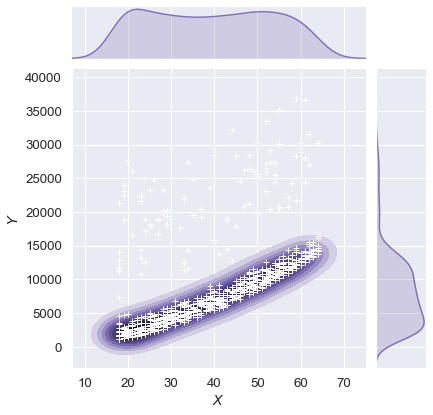

In [57]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

# Exercise

Explore the relationship between other variables in the current data using other pairs of features using one catplot per a relationship.  
Hence, you must plot one graph per the following type of catplot:
1. count
2. bar
3. box
4. swarm
5. violin